# 4.4. Решения уравнения фильтрации для постоянного забойного давления

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.1 от 21.10.2023

Хабибуллин Ринат 2023 г.

---

In [20]:
# импортируем библиотки, которые могут пригодиться для проведения расчетов
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sc
import anaflow

import sympy as sp

Рассматривается уравнение фильтрации в безразмерных переменных 

$$ 
\frac{\partial p_D}{ \partial t_D} = \frac{1}{r_D}\left[ \frac{ \partial{}}{ \partial{r_D} }\left( r_D \dfrac{\partial p_D}{ \partial r_D} \right) \right]  
\tag{1}
$$

где введены следующие безразмерные переменные
* $r_D$ - безразмерное расстояние от центра скважины
* $t_D$ - безразмерное время
* $p_D$ - безразмерное давление

Соответствующие определения безразмерных переменных

$$ r_D = \frac{r}{r_w} \tag{2}$$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}  \tag{3}$$
$$ p_D = \frac{kh}{ 18.41 q_{ref} B \mu} \left( p_i - p \right)  \tag{4} $$
$$ q_D = \frac{q}{q_{ref}} \tag{5}$$

где в свою очередь 
* $q$ - дебит скважины на поверхности, приведенный к нормальным условиям, м3/сут
* $q_{ref}$ - референсный дебит скважины на поверхности, приведенный к нормальным условиям, м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление забойное, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм
* $k$ - проницаемость, мД
* $t$ -  время, час
* $r$ - расстояние от центра скважины, м
* $r_w$ - радиус скважины, м

$$u \widetilde{p_D}  =  \dfrac{1}{r_D} \left[\dfrac{d}{d r_D} \left(r_D \dfrac{d{\widetilde{p_D}}}{d r_D} \right) \right]$$

Общее решение
$$\widetilde{p_D}(u, r_D) = A(u) K_0(r_D \sqrt u) + B(u) I_0(r_D \sqrt u) $$



In [42]:
# определим переменные с которыми будем работать 

t_d, r_d, q_d, u = sp.symbols('t_D r_D q_D u', real=True, positive=True)
p_wd = sp.symbols('p_wD', real=True, positive=True)
p0_wd = sp.symbols('p0_wD', real=True, positive=True)
p_d, Lp_d = sp.symbols('p_D Lp_D', cls=sp.Function, real=True, positive=True)

# зададим в явном виде решение с использованием K_0 и I_0
A, B = sp.symbols('A B')
eq_sol_general = sp.Eq(Lp_d(r_d) , A * sp.besselk(0, r_d * sp.sqrt(u)) + B * sp.besseli(0, r_d * sp.sqrt(u)))
display(eq_sol_general)

Eq(Lp_D(r_D), A*besselk(0, r_D*sqrt(u)) + B*besseli(0, r_D*sqrt(u)))

Зададим граничные условия


1. Граничное условия на внешнем контуре с замкнутой границей

$$\lim_{r_D \to \infty} p_D(r_D,t_D) = 0 $$
в пространстве Лапласа преобразуется в следующее

$$\lim_{r_D \to \infty} \widetilde{p_D}(r_D,u) = 0 $$

2. Граничное условие на скважине

$$\lim_{r_D \to 1} \left[  p_D(r_D, t_D) \right] = p_{wD} $$

в пространстве Лапласа  получим

$$\lim_{r_D \to 1} \left[  \widetilde{p_D}(r_D,u) \right] = \dfrac{p_{wD}}{u} $$

In [43]:
# граничное условие на скважине
eq_boundary = sp.Eq(p_d(r_d,t_d) , p_wd * t_d+ p0_wd)
display(eq_boundary)

Eq(p_D(r_D, t_D), p0_wD + p_wD*t_D)

In [44]:
# применим преобразование Лапласа к обеим частям граничного условия
eq_boundary_Laplace = sp.Eq(sp.laplace_transform(eq_boundary.lhs, t_d, u,  noconds=True) ,  
                            sp.laplace_transform(eq_boundary.rhs, t_d, u,  noconds=True))
display(eq_boundary_Laplace)

Eq(LaplaceTransform(p_D(r_D, t_D), t_D, u), p0_wD/u + p_wD/u**2)

In [45]:
# исходя из граничного условия на большом расстоянии получим B=0
eq_sol_general = eq_sol_general.subs(B,0)
display(eq_sol_general)

Eq(Lp_D(r_D), A*besselk(0, r_D*sqrt(u)))

In [46]:
# найдем А
eq_boundary_Laplace = sp.Eq(eq_sol_general.subs(r_d, 1).rhs, eq_boundary_Laplace.rhs)
eq_boundary_Laplace

Eq(A*besselk(0, sqrt(u)), p0_wD/u + p_wD/u**2)

In [47]:
sol_A = sp.solve(eq_boundary_Laplace,A)
display(sol_A)
sol_A = sol_A[0]
display(sol_A)

[(p0_wD*u + p_wD)/(u**2*besselk(0, sqrt(u)))]

(p0_wD*u + p_wD)/(u**2*besselk(0, sqrt(u)))

In [48]:
eq_sol_const_pres = eq_sol_general.subs(A, sol_A)
display(eq_sol_const_pres)

Eq(Lp_D(r_D), (p0_wD*u + p_wD)*besselk(0, r_D*sqrt(u))/(u**2*besselk(0, sqrt(u))))

$$q_D = -  r_D \dfrac{ \partial p_D(r_D, t_D)}{\partial r_D} $$

In [29]:
sol_qd = sp.Eq(q_d, (-r_d * sp.diff( eq_sol_const_pres.rhs, r_d)).subs(r_d,1))
display(sol_qd)

Eq(q_D, p_wD*besselk(1, sqrt(u))/(u**(3/2)*besselk(0, sqrt(u))))

In [32]:
# пример функции реализующий расчет решения в пространстве Лапласа
def qd_lapl_finite_rw(u, rd=1., p_wd=1):
    """
    расчет решения c конечным радиусом скважины для безразмерного давления в пространстве Лапласа
    u - переменная пространства Лапласа
    rd- безразмерное расстояние от центра скважины
    p_wd - безразмерный перепад давления на скважине
    """

    u05 = u**0.5
    return  p_wd * sc.kn(1,  u05) / (u*u05 *  sc.kn(0, u05))

# функция расчета безразмерного давления с использованием алгоритма Стефеста
# для численного обратного преобразования Лапласа
def qd_finite_rw_inv(td, r_d=1., p_wd = 1):

    qd_inv = anaflow.get_lap_inv(qd_lapl_finite_rw, rd=r_d, p_wd=p_wd)
    return qd_inv(td)

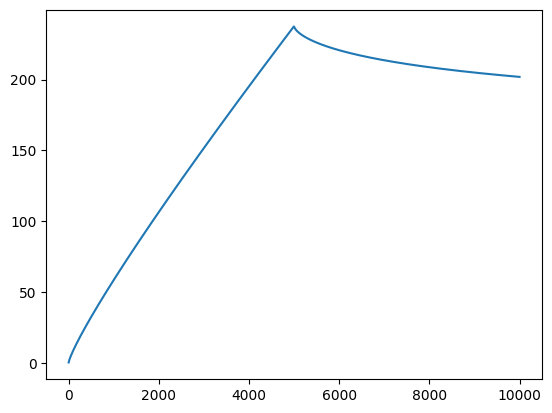

In [37]:
td_arr = np.linspace(1, 10000, 1000)
td24 = 5000
dpd = 0.2

td_new = td_arr-td24
td_new[td_new<0]=1
td_new

plt.plot(td_arr, qd_finite_rw_inv(td_arr, r_d=1, p_wd=dpd) + qd_finite_rw_inv(td_new, r_d=1, p_wd=-dpd) * np.heaviside(td_new-1,0) )
plt.show()

In [12]:
# определим функции для перевода размерных переменных в безразмерные и обратно
# пригодится потом для построения графиков и ведения расчетов

# при наименовании функций придерживаемся следующих соглашений
# сначала идет название того, что считаем
# в конце указывается размерность результата, если это уместно

def r_from_rd_m(rd, rw_m=0.1):
    """
    перевод безразмерного расстояния в размерное
    rd -  безразмерное расстояние
    rw_m -  радиус скважины, м
    """
    return rd*rw_m

def rd_from_r(r_m, rw_m=0.1):
    """
    перевод размерного расстояния в безразмерное
    r_m - размерное расстояние, м
    rw_m - радиус скважины, м
    """
    return r_m/rw_m

def t_from_td_hr(td, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод безразмерного времени в размерное, результат в часах
    td - безразмерное время
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return td * phi * mu_cP * ct_1atm * rw_m * rw_m / k_mD / 0.00036

def td_from_t(t_hr, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод размерного времени в безразмерное
    t_hr - размерное время, час
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return  0.00036 * t_hr * k_mD / (phi * mu_cP * ct_1atm * rw_m * rw_m)

def p_from_pd_atma(pd, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод безразмерного давления в размерное, результат в абсолютных атмосферах
    pd - безразмерное давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return pi_atma - pd * 18.41 * q_sm3day * b_m3m3 * mu_cP / k_mD / h_m

def pd_from_p(p_atma, k_mD=10, h_m=10, q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод размерного давления в безразмерное
    p_atma - давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return (pi_atma - p_atma) / (18.41 * q_sm3day * b_m3m3 * mu_cP) * k_mD * h_m

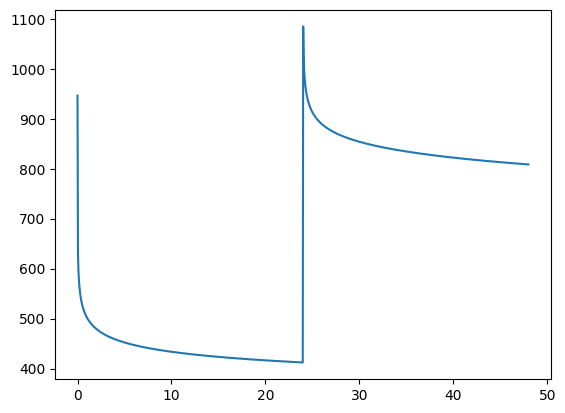

In [13]:
t_arr = np.linspace(0.001, 48, 1000)

# исходные параметры модели
k = 20
mu = 0.5
dp = 50
dpd = pd_from_p(dp,
                k_mD = k,
                h_m =10,
                q_sm3day=1,
                b_m3m3=1.2,
                mu_cP=mu,
                pi_atma=250)

td24 = td_from_t(24,
                   k_mD=k,
                   phi=0.2,
                   mu_cP=mu,
                   ct_1atm=1e-5,
                   rw_m=0.1)
td_arr = td_from_t(t_arr,
                   k_mD=k,
                   phi=0.2,
                   mu_cP=mu,
                   ct_1atm=1e-5,
                   rw_m=0.1)

td_new = td_arr-td24
td_new[td_new<0]=1
td_new

plt.plot(t_arr, qd_finite_rw_inv(td_arr, r_d=1, p_wd=dpd) + 
                qd_finite_rw_inv(td_new, r_d=1, p_wd=dpd) * np.heaviside(td_new-1,0) )
plt.show()

Для введенного безразмерного дебита можно показать, что если известное решение в пространстве Лапласа для задачи с постоянным дебитом $\tilde{p}_D(s)$ тогда решение симметричной задачи с постоянным давлением для безразмерного дебита $\tilde{q}_D(s)$ на скважине можно найти из выражения 

$$ \tilde{p}_D(s) \tilde{q}_D(s) =\frac{1}{s^2} \tag{17.7} $$

Пример 

Решение задачи с постоянным дебитом для конечного радиуса скважины в пространстве Лапласа будет иметь вид


$$ \tilde{p}_D(s) = \frac{1}{s^{\frac{3}{2}}} \frac{ K_0 \left( r_D \sqrt s  \right) }{K_1 \left(  \sqrt s  \right)} \tag{17.8}$$

где 

$K_0$, $K_1$ - <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"
                        target="_blank" rel="noreferrer noopener">модифицированные функции Бесселя&nbsp;</a>
                        
Тогда для случая постоянного забойного давления можно получить

$$ \tilde{q}_D(s) = \frac{1}{s^{\frac{1}{2}}} \frac{ K_1 \left(  \sqrt s  \right) }{K_0 \left(  \sqrt s  \right)} \tag{17.9}$$

К решению для безразмерного дебита также можно применить обратное преобразование Лапласа и получить значения безразмерного дебита и затем и размерного дебита. 